<a href="https://colab.research.google.com/github/jhChoi1997/EE488_DCASE_baseline/blob/main/EE488_AI_Convergence_Capstone_Design_Anomaly_Detection_Experiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EE488 AI Convergence Capstone Design : Anomaly Detection**

## **Experiment 1 : Audio Data Preprocessing**

Audio data can be preprocessed in many ways for deep learning. In this experiment, we will learn how to preprocess audio data using the DCASE 2020 task 2 dataset. 💻

In [1]:
!gdown https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
!unzip dataset.zip
!mkdir data
!mv ToyCar fan valve data

Downloading...
From: https://drive.google.com/uc?id=18Mm7JjrTstMN7EuV8YBpUEiQX_rV0nYk
To: /content/dataset.zip
100% 5.55M/5.55M [00:00<00:00, 48.0MB/s]
Archive:  dataset.zip
   creating: fan/
  inflating: fan/anomaly_id_00_00000010.wav  
  inflating: fan/anomaly_id_02_00000000.wav  
  inflating: fan/anomaly_id_04_00000012.wav  
  inflating: fan/anomaly_id_06_00000002.wav  
  inflating: fan/normal_id_00_00000007.wav  
  inflating: fan/normal_id_02_00000012.wav  
  inflating: fan/normal_id_04_00000006.wav  
  inflating: fan/normal_id_06_00000015.wav  
   creating: ToyCar/
  inflating: ToyCar/anomaly_id_01_00000019.wav  
  inflating: ToyCar/anomaly_id_02_00000018.wav  
  inflating: ToyCar/anomaly_id_03_00000003.wav  
  inflating: ToyCar/normal_id_01_00000010.wav  
  inflating: ToyCar/normal_id_02_00000013.wav  
  inflating: ToyCar/normal_id_03_00000013.wav  
   creating: valve/
  inflating: valve/anomaly_id_00_00000023.wav  
  inflating: valve/anomaly_id_02_00000016.wav  
  inflating: val

### **1. Load Audio Dataset**

First import librosa. Then use 'librosa.load' to load the audio file. In the below code, y stands for signal, and sr stands for the sampling rate of y.

In [2]:
import librosa
import numpy as np
file_dir= './data/ToyCar/normal_id_01_00000010.wav'
y, sr = librosa.load(file_dir, sr = 16000)

See how it looks! The below audio is about a normal toy car.

shape of signal is :(176000,)
signal is [0.0111084  0.01489258 0.01956177 ... 0.00888062 0.00863647 0.01101685]
sampling rate is 16000hz
waveform is like below.


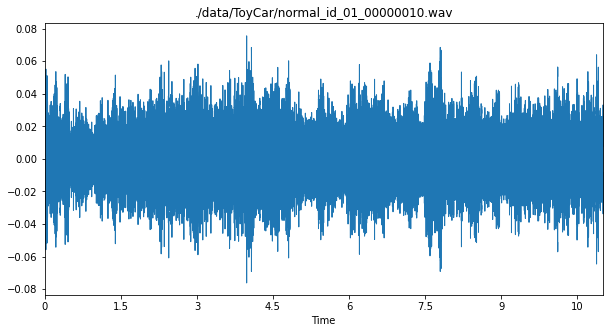

In [3]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
print(f'shape of signal is :{y.shape}')
print(f'signal is {y}')
print(f'sampling rate is {sr}hz')
print('waveform is like below.')
fig = plt.figure(figsize=(10, 5))
plt.title('./data/ToyCar/normal_id_01_00000010.wav')
librosa.display.waveplot(y,sr)

Then listen!

In [4]:
import IPython.display as ipd
ipd.Audio(data=y,rate=sr)

### **2. Spectrogram**

Even though some deep learning models use audio signals as input, many deep learning models use two-dimensional data. To make audio data into two-dimensional data, we can convert audio signals to spectrogram.

In [5]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

See the shape of the data

In [6]:
print(D.shape)

(1025, 344)


Plot the spectrogram

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

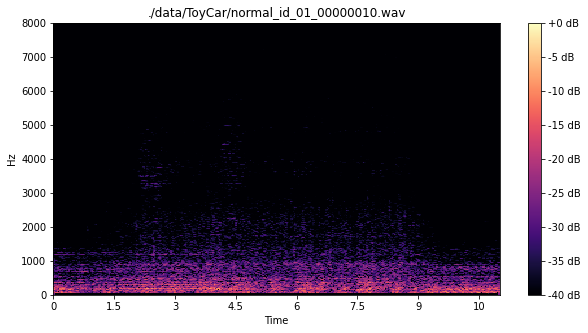

In [7]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(D, y_axis='linear', x_axis='time', vmin=-40, vmax=0, hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

### **3. MelSpectrogram**

Some deep learning model uses Melspectrogram instead of spectrogram. Melspectrogram can be obtained by applying Mel filter bank on spectrogram. 

In [8]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

See the shape of the data. 

In [9]:
print(S_dB.shape)

(128, 344)


Plot the melspectrogram

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

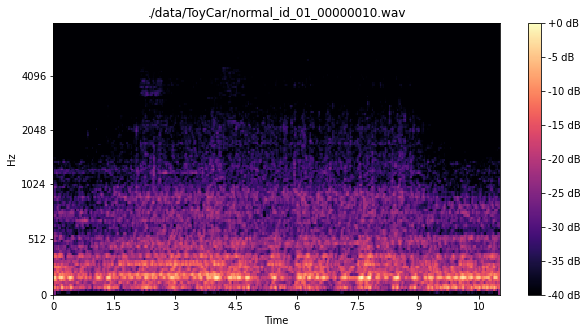

In [10]:
plt.figure(figsize=(10, 5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

### **4. Additional Preprocessing**

Now we learned how to convert audio signals into spectrogram and melspectrogram. Still, additional preprocessing methods can be applied on the spectrogram or Mel spectrogram. From below, three major additional preprocessing techniques will be introduced. For convenience, only the melspectrogram will be used as an example. 

**4-1. Restricting dB**

For some melspectrograms, the dB range can vary too much. (Which means the lower bound of dB can be very low.) In this case, there is a risk that the model can focus on this low-powered part instead of high powered part, where machinery sound is placed. To avoid this, it can cut low dB by changing the parameter top_db.

※ Below code shows 0~-80dB, so it does not differ in the figure. However, keep in mind that this improves performance on anomaly detection.

Text(0.5, 1.0, './data/ToyCar/normal_id_01_00000010.wav')

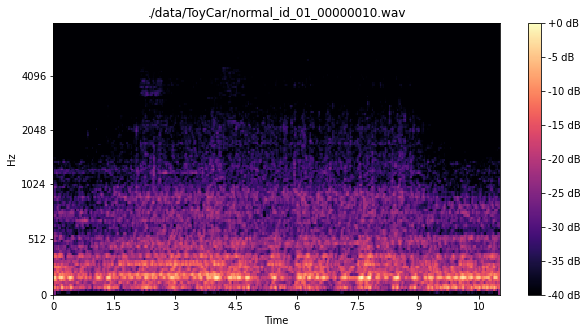

In [11]:
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr) 
plt.figure(figsize=(10, 5))
S_dB = librosa.power_to_db(S, ref=np.max, top_db = 80.0) # Top dB
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('./data/ToyCar/normal_id_01_00000010.wav')

**4-2. Normalization**

When recording machine conditions, noise can corrupt machinery sound, hindering the model from detecting anomalies. If we can reduce noise, the model can concentrate more on machinery sounds. Then how can we do that? In the real world, there are many stationary noises. Normalizing melspectrogram in the time axis can be considered to reduce these noises.

※ Be sure to calculate the mean and standard deviation on all normal data.

In [12]:
import os
file_dirs = ['./data/valve/' + idir for idir in os.listdir('./data/valve') if 'normal' in idir]
all_S_dBs_ = []
hop_length = 512
n_fft = 2048
for isig in file_dirs:
  y, sr = librosa.load(file_dir, sr = 16000)
  Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
  D = np.abs(Y)**2 
  S = librosa.feature.melspectrogram(S=D, sr=sr) 
  S_dB = librosa.power_to_db(S, ref=np.max)
  all_S_dBs_.append(S_dB)
all_S_dBs = np.array(all_S_dBs_)
S_mean = np.tile(np.mean(all_S_dBs, axis = (0,2)),(313,1)).T
S_var = np.tile(np.std(all_S_dBs, axis = (0,2)),(313,1)).T
print(S_mean.shape)

(128, 313)


Using S_mean and S_var calculated above, normalize melspectrogram.

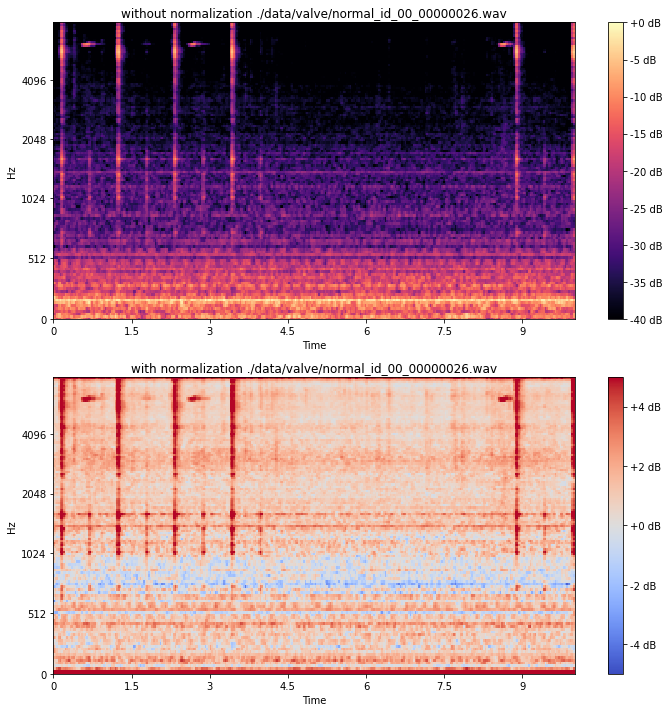

In [13]:
file_dir= './data/valve/normal_id_00_00000026.wav'
y, sr = librosa.load(file_dir, sr = 16000)
hop_length = 512
n_fft = 2048
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D = np.abs(Y)**2 
S = librosa.feature.melspectrogram(S=D, sr=sr) 
S_dB = librosa.power_to_db(S, ref=np.max)

# normalization
# ============================

S_norm = (S_dB - S_mean) / S_var

# ============================

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
plt.title('without normalization ./data/valve/normal_id_00_00000026.wav')
plt.tight_layout()
plt.colorbar(format='%+2.0f dB')
plt.subplot(2,1,2)
img = librosa.display.specshow(S_norm, x_axis='time', y_axis='mel', vmin=-5, vmax=5, sr=sr)
plt.title('with normalization ./data/valve/normal_id_00_00000026.wav')
plt.tight_layout()
plt.colorbar(format='%+2.0f dB')

## **5. Analyzing normal/anomalous sounds of machines**
Now, using the preprocessing method explained above, let's analyze the DCASE 2020 dataset.


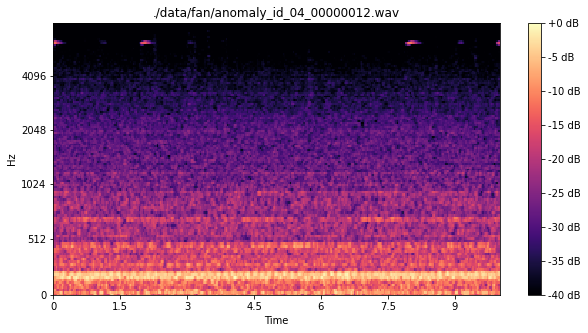

In [14]:
os.makedirs('figures', exist_ok = True)
machine_type = os.listdir('./data')
data_list = [os.listdir('./data/'+idir) for idir in machine_type]
imdx = 0
data_list_sp = []
for imachine in machine_type:
  for idata in data_list[imdx]:

    data_list_sp.append('./data/' + imachine + '/' + idata)

  imdx = imdx + 1

dataset_len = len(data_list_sp)
plt.figure(figsize=(10, 5))
hop_length = 512
n_fft = 2048
plt.rcParams['figure.constrained_layout.use'] = True
for idata in range(dataset_len):
  y, sr = librosa.load(data_list_sp[idata], sr = 16000)
  Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
  D = np.abs(Y)**2 
  S = librosa.feature.melspectrogram(S=D, sr=sr) 
  S_dB = librosa.power_to_db(S, ref=np.max)
  img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', vmin=-40, vmax=0, sr=sr)
  if idata == 0:
    plt.colorbar(format='%+2.0f dB')
  plt.title(data_list_sp[idata])
  plt.savefig('./figures/'+data_list_sp[idata].split('/')[-1]+'.jpg')
  plt.clf

In [15]:
import zipfile
file_figure = ['./figures/' + ifile for ifile in os.listdir('./figures')]
with zipfile.ZipFile("Experiment_1.zip", 'w') as my_zip:
    for i in file_figure:
        my_zip.write(i)
    for i in data_list_sp:
        my_zip.write(i)
    my_zip.close()

Download Experiment_1.zip and analyze melspectrograms in figures.

※Compare each melspectrograms with an audio file in data.

Answer to below questions.

**5-1. Is Toy Car/fan/valve stationary or temporal?**

**5-2. What is the difference between normal and anomaly audio data in Toy Car/fan/valve?**